In [1]:
import numpy as np
import scipy.stats as stats

# 创建模型
def create_model(true_variance, size):
    return np.random.normal(0, np.sqrt(true_variance), size)

# 添加不确定性
def add_uncertainty(data, uncertainty_factor):
    return data + np.random.normal(0, uncertainty_factor, len(data))

# 收集数据
def collect_data(true_variance, size, uncertainty_factor):
    data = create_model(true_variance, size)
    uncertain_data = add_uncertainty(data, uncertainty_factor)
    return uncertain_data

# 做分析
def analyze_data(data, hypothesized_variance):
    n = len(data)
    sample_variance = np.var(data, ddof=1)
    chi_squared_stat = (n - 1) * sample_variance / hypothesized_variance
    
    # 计算临界值
    alpha1 = 0.025
    alpha2 = 0.05
    chi2_critical1 = stats.chi2.ppf(1 - alpha1, df=n - 1)
    chi2_critical2 = stats.chi2.ppf(1 - alpha2, df=n - 1)
    
    # 输出分析结果
    print(f"Chi-squared Statistic: {chi_squared_stat}")
    print(f"Chi-squared Critical Value (alpha={alpha1}): {chi2_critical1}")
    print(f"Chi-squared Critical Value (alpha={alpha2}): {chi2_critical2}")
    
    if chi_squared_stat < chi2_critical1:
        print("Do not reject H0 at alpha = 0.025")
    else:
        print("Reject H0 at alpha = 0.025")
    
    if chi_squared_stat < chi2_critical2:
        print("Do not reject H0 at alpha = 0.05")
    else:
        print("Reject H0 at alpha = 0.05")

# 参数设置
true_variance = 4.0
hypothesized_variance = 4.0
sample_size = 17
uncertainty_factor = 1.0

# 收集数据并分析
data = collect_data(true_variance, sample_size, uncertainty_factor)
analyze_data(data, hypothesized_variance)


Chi-squared Statistic: 10.676400197621517
Chi-squared Critical Value (alpha=0.025): 28.845350723404753
Chi-squared Critical Value (alpha=0.05): 26.29622760486423
Do not reject H0 at alpha = 0.025
Do not reject H0 at alpha = 0.05


Chi-squared Statistic: 10.737108571314451
Chi-squared Critical Value (alpha=0.025): 28.845350723404753
Chi-squared Critical Value (alpha=0.05): 26.29622760486423
Do not reject H0 at alpha = 0.025
Do not reject H0 at alpha = 0.05


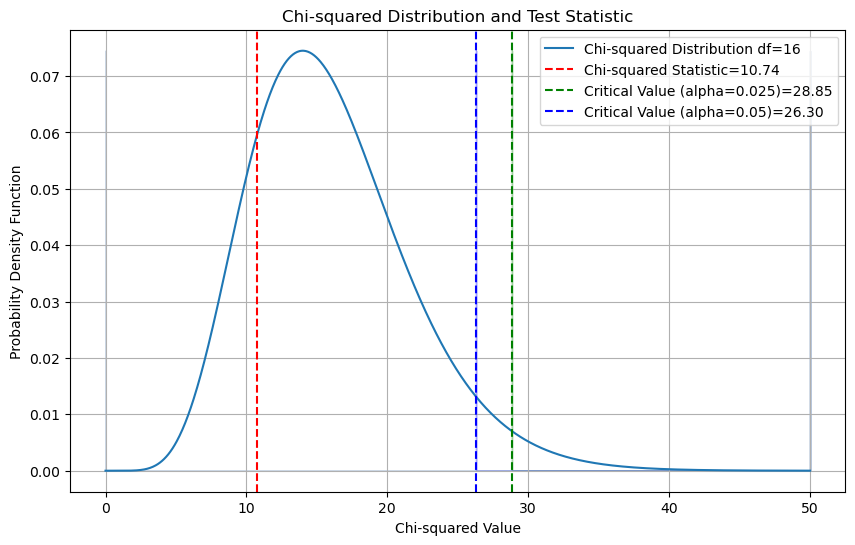

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 创建模型
def create_model(true_variance, size):
    return np.random.normal(0, np.sqrt(true_variance), size)

# 添加不确定性
def add_uncertainty(data, uncertainty_factor):
    return data + np.random.normal(0, uncertainty_factor, len(data))

# 收集数据
def collect_data(true_variance, size, uncertainty_factor):
    data = create_model(true_variance, size)
    uncertain_data = add_uncertainty(data, uncertainty_factor)
    return uncertain_data

# 做分析
def analyze_data(data, hypothesized_variance):
    n = len(data)
    sample_variance = np.var(data, ddof=1)
    chi_squared_stat = (n - 1) * sample_variance / hypothesized_variance
    
    # 计算临界值
    alpha1 = 0.025
    alpha2 = 0.05
    chi2_critical1 = stats.chi2.ppf(1 - alpha1, df=n - 1)
    chi2_critical2 = stats.chi2.ppf(1 - alpha2, df=n - 1)
    
    # 输出分析结果
    print(f"Chi-squared Statistic: {chi_squared_stat}")
    print(f"Chi-squared Critical Value (alpha={alpha1}): {chi2_critical1}")
    print(f"Chi-squared Critical Value (alpha={alpha2}): {chi2_critical2}")
    
    if chi_squared_stat < chi2_critical1:
        print("Do not reject H0 at alpha = 0.025")
    else:
        print("Reject H0 at alpha = 0.025")
    
    if chi_squared_stat < chi2_critical2:
        print("Do not reject H0 at alpha = 0.05")
    else:
        print("Reject H0 at alpha = 0.05")
    
    return chi_squared_stat, chi2_critical1, chi2_critical2, n - 1

# 绘制卡方分布图
def plot_chi_squared(chi_squared_stat, chi2_critical1, chi2_critical2, df):
    x = np.linspace(0, 50, 1000)
    y = stats.chi2.pdf(x, df)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Chi-squared Distribution df={df}')
    
    plt.axvline(chi_squared_stat, color='r', linestyle='--', label=f'Chi-squared Statistic={chi_squared_stat:.2f}')
    plt.axvline(chi2_critical1, color='g', linestyle='--', label=f'Critical Value (alpha=0.025)={chi2_critical1:.2f}')
    plt.axvline(chi2_critical2, color='b', linestyle='--', label=f'Critical Value (alpha=0.05)={chi2_critical2:.2f}')
    
    plt.fill_betweenx(y, chi2_critical1, x[-1], color='green', alpha=0.3)
    plt.fill_betweenx(y, chi2_critical2, x[-1], color='blue', alpha=0.3)
    plt.fill_betweenx(y, 0, chi2_critical1, color='green', alpha=0.1)
    plt.fill_betweenx(y, 0, chi2_critical2, color='blue', alpha=0.1)
    
    plt.title('Chi-squared Distribution and Test Statistic')
    plt.xlabel('Chi-squared Value')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# 参数设置
true_variance = 4.0
hypothesized_variance = 4.0
sample_size = 17
uncertainty_factor = 1.0

# 收集数据并分析
data = collect_data(true_variance, sample_size, uncertainty_factor)
chi_squared_stat, chi2_critical1, chi2_critical2, df = analyze_data(data, hypothesized_variance)

# 绘制图表
plot_chi_squared(chi_squared_stat, chi2_critical1, chi2_critical2, df)
